### SUPPORT VECTOR MACHINE (SVM)
- SVM is a supervised machine learning algorithm that can classify cases by finding a separator (hyperplane) that best divides a dataset into classes.
- SVM works by first, mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable.
- The goal of SVM is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.

##### Applications of SVM:
   - Face Detection 
   - Text Classification
   - Steganography Detection

Dimension Expansion
- we can transform our 2D data into 3D data by adding a new feature z = x^2 + y^2. This transformation allows us to find a hyperplane that can separate the classes in the higher-dimensional space, which may not be possible in the original 2D space.
- Seperation boundary gets simmplified in higher dimension.

Hyperplane
- A hyperplane is a decision boundary that separates different classes in the feature space. In SVM, the goal is to find the optimal hyperplane that maximizes the margin between the classes.
- separated by a plane separator.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Load the dataset
data = pd.read_csv('waste management.csv')
data.head()


,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0


In [41]:
# Display the first few rows
print(data.head())
print(data.info())
print("\n")
print(data.describe())
# Check for missing values
print(data.isnull().sum())
# Handle missing values if necessary
data.fillna(data.mean(), inplace=True)


   waste_type  material_composition  recycling_potential  toxicity_level  \
0           3              0.198716             0.016588       81.011339   
1           1              0.005522             0.512093       86.707232   
2           3              0.815461             0.226496       91.324055   
3           3              0.706857             0.645173       51.134240   
4           1              0.729007             0.174366       50.151629   

   management_strategy  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   waste_type            100 non-null    int64  
 1   material_composition  100 non-null    float64
 2   recycling_potential   100 non-null    float64
 3   toxicity_level        100 non-

In [42]:
# Feature (x) and Target (y) separation
X = data[['waste_type','material_composition','recycling_potential','toxicity_level']]
y = data['management_strategy']

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [45]:

y_pred = model.predict(X_test)


In [46]:

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


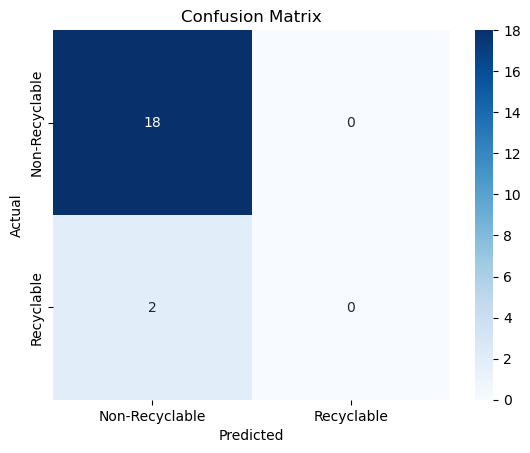

In [47]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Recyclable', 'Recyclable'], 
            yticklabels=['Non-Recyclable', 'Recyclable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [48]:

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Non-Recyclable', 'Recyclable']))


                precision    recall  f1-score   support

Non-Recyclable       0.90      1.00      0.95        18
    Recyclable       0.00      0.00      0.00         2

      accuracy                           0.90        20
     macro avg       0.45      0.50      0.47        20
  weighted avg       0.81      0.90      0.85        20



c:\Users\Asys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
import joblib
# Save the model to a file
joblib.dump(model, 'waste management.pkl')


['waste management.pkl']

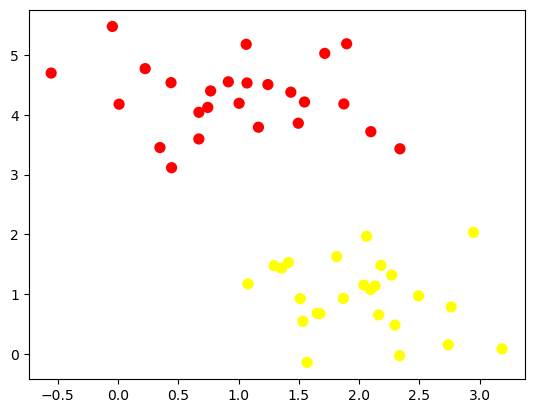

In [50]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


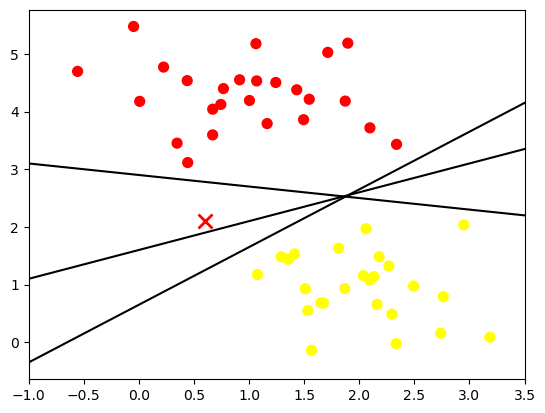

In [51]:


xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()


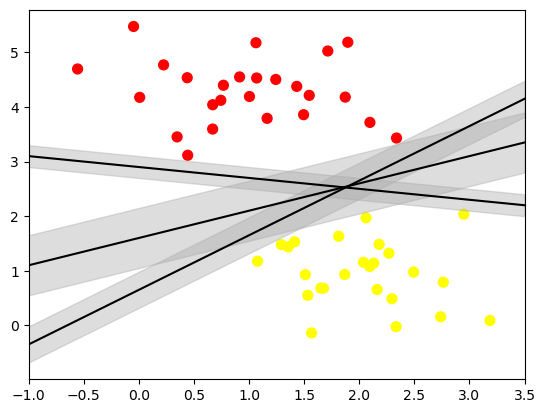

In [52]:

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.show()


In [53]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)






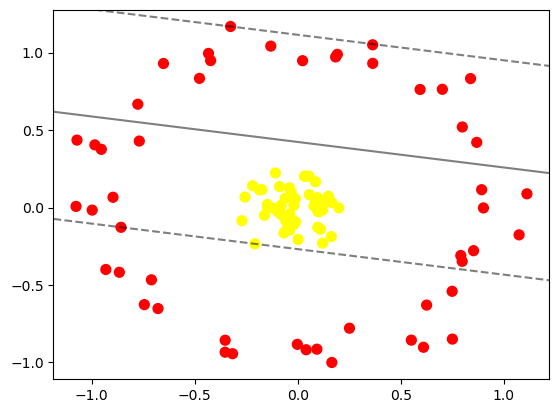

In [54]:
model.support_vectors_

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
plt.show()

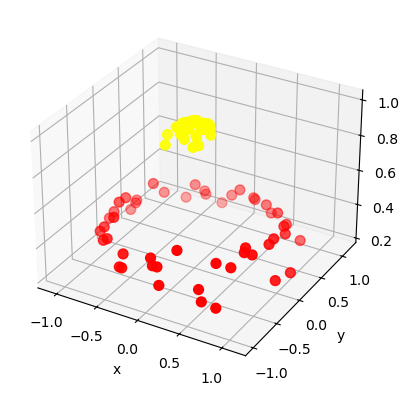

In [55]:

from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual


r = np.exp(-(X ** 2).sum(1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()



In [56]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [57]:
clf.support_vectors_

array([[ 0.79912424,  0.51991359],
       [-0.7108679 , -0.46684171],
       [ 0.02342159,  0.94797262],
       [-0.3525697 , -0.85700803],
       [ 0.25109735, -0.77935613],
       [-0.76979451,  0.42895601],
       [ 0.79182442, -0.3099465 ],
       [ 0.59412826,  0.76217755],
       [ 0.89306081,  0.11495565],
       [ 0.16285547, -0.18810918],
       [-0.20799689, -0.2345986 ],
       [-0.10855304,  0.22313543]])

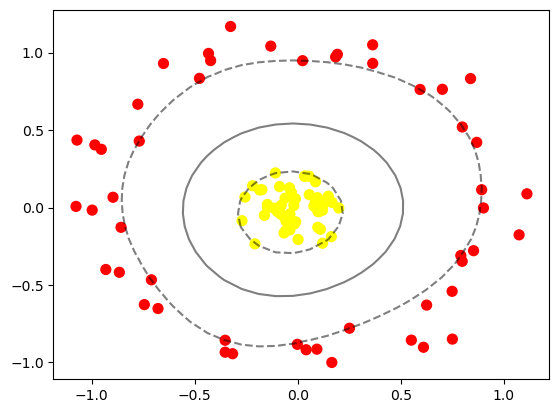

In [58]:
clf.support_vectors_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')
plt.show()

